# Comparing Suburbs and Identifying Clusters

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

## Data Imports 

In [9]:
# 2016-2017 Data
df = pd.read_excel(open('data/ts17individual06taxablestatusstatepostcode.xlsx', 'rb'),sheet_name='Individuals Table 6A', skiprows=2) 


In [13]:
df = df.dropna()
df.head()

,Taxable status,State/ Territory1,Postcode,Number of individuals\nno.,Taxable income or loss3\nno.,Taxable income or loss3\n$,Tax on taxable income\nno.,Tax on taxable income\n$,Medicare levy\nno.,Medicare levy\n$,...,Small business income tax offset\n$,Low income tax offset\nno.,Low income tax offset\n$,People with private health insurance\nno.,Private health insurance - your Australian Government rebate received\nno.,Private health insurance - your Australian Government rebate received\n$,Private health insurance rebate\nno.,Private health insurance rebate\n$,Excess private health reduction or refund (rebate reduced)\nno.,Excess private health reduction or refund (rebate reduced)\n$
0,Non Taxable,ACT,2600,990,955,12178035,252,600927.61,12,18965.56,...,35.70,167,52893.45,709,485,438487,62,31311.95,54,26106.34
1,Non Taxable,ACT,2601,926,900,8450463,106,100352.34,2,2035.10,...,0.00,71,18469.66,360,128,92163,36,11833.38,9,3535.81
2,Non Taxable,ACT,2602,3940,3827,47998008,975,1233763.38,15,13376.38,...,224.42,609,180083.00,2093,1279,906389,148,51957.17,127,36297.11
3,Non Taxable,ACT,2603,1038,987,11801187,262,328895.92,8,8044.22,...,22.02,168,48477.62,678,435,364649,52,24361.23,55,25994.12
4,Non Taxable,ACT,2604,1174,1128,12936892,282,339046.69,6,2922.44,...,73.66,176,50491.51,690,464,337944,71,28828.31,62,23169.06


### NSW dataframe

In [17]:
df_nsw = df[df['State/ Territory1'] == 'NSW']
df_nsw.head()

,Taxable status,State/ Territory1,Postcode,Number of individuals\nno.,Taxable income or loss3\nno.,Taxable income or loss3\n$,Tax on taxable income\nno.,Tax on taxable income\n$,Medicare levy\nno.,Medicare levy\n$,...,Small business income tax offset\n$,Low income tax offset\nno.,Low income tax offset\n$,People with private health insurance\nno.,Private health insurance - your Australian Government rebate received\nno.,Private health insurance - your Australian Government rebate received\n$,Private health insurance rebate\nno.,Private health insurance rebate\n$,Excess private health reduction or refund (rebate reduced)\nno.,Excess private health reduction or refund (rebate reduced)\n$
29,Non Taxable,NSW,1225,10,10,18093,1,1783.15,0,0.0,...,0.00,0,0.00,1,1,171,0,0.00,0,0.00
30,Non Taxable,NSW,1230,18,16,145316,6,6465.13,0,0.0,...,0.00,3,715.95,11,11,8987,0,0.00,0,0.00
31,Non Taxable,NSW,1235,145,144,1632937,34,12210.69,0,0.0,...,32.85,29,8252.25,17,13,6325,5,349.55,0,0.00
32,Non Taxable,NSW,1240,19,16,22399,3,521.74,0,0.0,...,0.00,3,521.74,6,6,3635,0,0.00,1,4.43
33,Non Taxable,NSW,1335,18,17,168662,5,5451.48,0,0.0,...,0.00,1,371.83,11,11,7667,1,212.86,2,210.63


#### NSW postcodes and Taxable income or loss value dataframe 

In [38]:
df_nsw_taxable_income = df_nsw[['Postcode', 'Taxable income or loss3\n$']].copy()
df_nsw_taxable_income = df_nsw_taxable_income.rename(columns={'Taxable income or loss3\n$': 'Taxable income or loss'})
df_nsw_taxable_income = df_nsw_taxable_income[df_nsw_taxable_income['Postcode'] != 'NSW other']
df_nsw_taxable_income

,Postcode,Taxable income or loss
29,1225,18093
30,1230,145316
31,1235,1632937
32,1240,22399
33,1335,168662
...,...,...
3381,2878,11617426
3382,2879,10433483
3383,2880,448101009
3384,2898,19047629


Calculate the standard square to understand how many clusters we should pick

In [39]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_nsw_taxable_income)
    sse.append(km.inertia_)

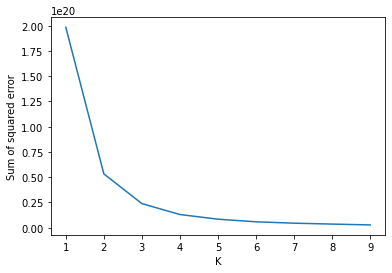

In [40]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

**From the graph above, we see that it elbows at around k = 4. We will use our value of k as 4.** 

In [41]:
km = KMeans(n_clusters=4)
yp = km.fit_predict(df_nsw_taxable_income)
yp

array([0, 0, 0, ..., 3, 0, 0], dtype=int32)

In [44]:
df_nsw_taxable_income['cluster'] = yp
df_nsw_taxable_income.head(2)

,Postcode,Taxable income or loss,cluster
29,1225,18093,0
30,1230,145316,0


In [45]:
df_nsw_taxable_income.cluster.unique()


array([0, 2, 3, 1], dtype=int32)

In [48]:
df1 = df_nsw_taxable_income[df_nsw_taxable_income.cluster==0]
df2 = df_nsw_taxable_income[df_nsw_taxable_income.cluster==1]
df3 = df_nsw_taxable_income[df_nsw_taxable_income.cluster==2]
df4 = df_nsw_taxable_income[df_nsw_taxable_income.cluster==3]
df1.head()

,Postcode,Taxable income or loss,cluster
29,1225,18093,0
30,1230,145316,0
31,1235,1632937,0
32,1240,22399,0
33,1335,168662,0


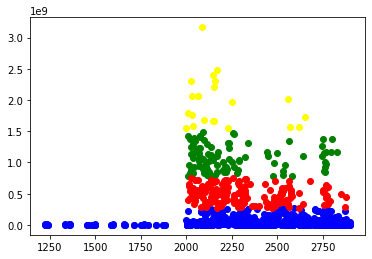

In [49]:
plt.scatter(df1['Postcode'],df1['Taxable income or loss'],color='blue')
plt.scatter(df2['Postcode'],df2['Taxable income or loss'],color='green')
plt.scatter(df3['Postcode'],df3['Taxable income or loss'],color='yellow')
plt.scatter(df4['Postcode'],df4['Taxable income or loss'],color='red')

### Victoria dataframe

In [58]:
df_vic = df[df['State/ Territory1'] == 'VIC']
df_vic.head()

,Taxable status,State/ Territory1,Postcode,Number of individuals\nno.,Taxable income or loss3\nno.,Taxable income or loss3\n$,Tax on taxable income\nno.,Tax on taxable income\n$,Medicare levy\nno.,Medicare levy\n$,...,Small business income tax offset\n$,Low income tax offset\nno.,Low income tax offset\n$,People with private health insurance\nno.,Private health insurance - your Australian Government rebate received\nno.,Private health insurance - your Australian Government rebate received\n$,Private health insurance rebate\nno.,Private health insurance rebate\n$,Excess private health reduction or refund (rebate reduced)\nno.,Excess private health reduction or refund (rebate reduced)\n$
1617,Non Taxable,VIC,3000,7951,7515,70828400,1237,756179.09,13,20169.94,...,146.92,1102,283411.00,1353,837,524875,221,51509.01,68,24568.10
1618,Non Taxable,VIC,3001,93,90,239661,9,10545.85,0,0.00,...,0.00,4,1117.00,29,17,16150,2,2448.16,2,272.98
1619,Non Taxable,VIC,3002,620,567,7095186,147,300036.20,5,8688.28,...,206.17,97,28234.63,384,301,265520,37,15175.33,37,12725.55
1620,Non Taxable,VIC,3003,986,944,9828829,193,81031.81,1,827.74,...,36.65,164,40601.83,265,166,108483,24,6065.77,13,2887.40
1621,Non Taxable,VIC,3004,1542,1417,13919356,310,293278.63,7,4271.54,...,290.54,215,58315.00,777,636,561786,76,27835.11,36,12879.86


In [60]:
df_vic_taxable_income = df_vic[['Postcode', 'Taxable income or loss3\n$']].copy()
df_vic_taxable_income = df_vic_taxable_income.rename(columns={'Taxable income or loss3\n$': 'Taxable income or loss'})
df_vic_taxable_income = df_vic_taxable_income[df_vic_taxable_income['Postcode'] != 'VIC other']
df_vic_taxable_income

,Postcode,Taxable income or loss
1617,3000,70828400
1618,3001,239661
1619,3002,7095186
1620,3003,9828829
1621,3004,13919356
...,...,...
5014,3990,3447454
5015,3991,6209207
5016,3992,19538554
5017,3995,192344648


In [61]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_vic_taxable_income)
    sse.append(km.inertia_)

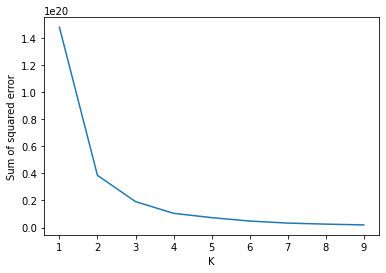

In [62]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [67]:
km = KMeans(n_clusters=4)
yp = km.fit_predict(df_vic_taxable_income)
yp

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [68]:
df_vic_taxable_income['cluster'] = yp
df_vic_taxable_income.cluster.unique()


array([0, 1, 3, 2], dtype=int32)

In [69]:
df1 = df_vic_taxable_income[df_vic_taxable_income.cluster==0]
df2 = df_vic_taxable_income[df_vic_taxable_income.cluster==1]
df3 = df_vic_taxable_income[df_vic_taxable_income.cluster==2]
df4 = df_vic_taxable_income[df_vic_taxable_income.cluster==3]
df1.head()

,Postcode,Taxable income or loss,cluster
1617,3000,70828400,0
1618,3001,239661,0
1619,3002,7095186,0
1620,3003,9828829,0
1621,3004,13919356,0


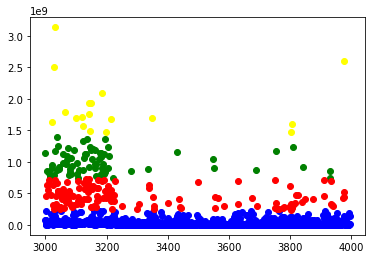

In [70]:
plt.scatter(df1['Postcode'],df1['Taxable income or loss'],color='blue')
plt.scatter(df2['Postcode'],df2['Taxable income or loss'],color='green')
plt.scatter(df3['Postcode'],df3['Taxable income or loss'],color='yellow')
plt.scatter(df4['Postcode'],df4['Taxable income or loss'],color='red')